# Problem Set 3

**AS.171.402: Applied Quantum Information (Spring 2022)**

**Due Date: March 15, 2022**

In [3]:
import qiskit as qk
import numpy as np
from qiskit import Aer
from qiskit.visualization import plot_histogram
from qiskit import IBMQ
%matplotlib inline

import matplotlib.pyplot as plt

# Problem 1

In [27]:
num_qubits = 3
num_variables = 3
qr_x = qk.QuantumRegister(num_qubits, name='q')
qr_a = qk.QuantumRegister(1, name='a')
cr = qk.ClassicalRegister(num_variables, name='c')

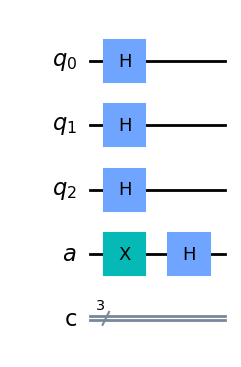

In [28]:
state_prep = qk.QuantumCircuit(qr_x, qr_a, cr)
# --- Insert state preparation circuit here ---
state_prep.x(3)
state_prep.h(range(4))
state_prep.draw('mpl', fold=-1)

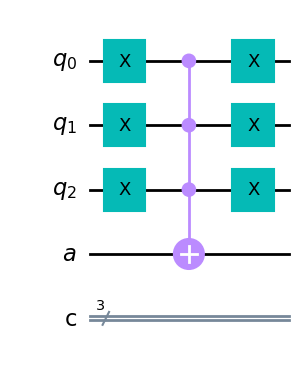

In [29]:
oracle = qk.QuantumCircuit(qr_x, qr_a, cr)
# --- Insert oracle circuit here ---
oracle.x([0, 1, 2])
oracle.mct([0,1,2],3)
oracle.x([0, 1, 2])
oracle.draw('mpl', fold=-1)

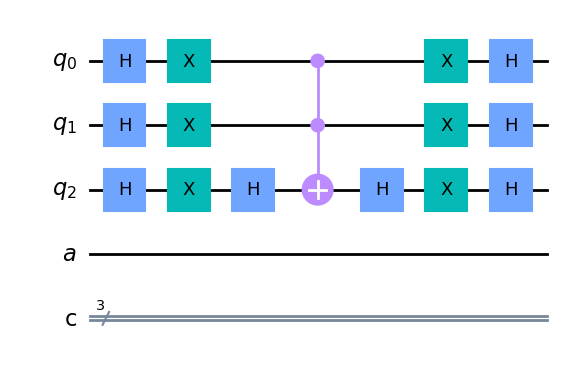

In [30]:
diffuser = qk.QuantumCircuit(qr_x, qr_a, cr)
# --- Insert diffuser circuit here ---
diffuser.h([0,1,2])
diffuser.x([0,1,2])
diffuser.h(2)
diffuser.mct([0,1], 2)
diffuser.h(2)

diffuser.barrier(range(3))

diffuser.x([0,1,2])
diffuser.h([0,1,2])
diffuser.draw('mpl', fold=-1, plot_barriers=False)

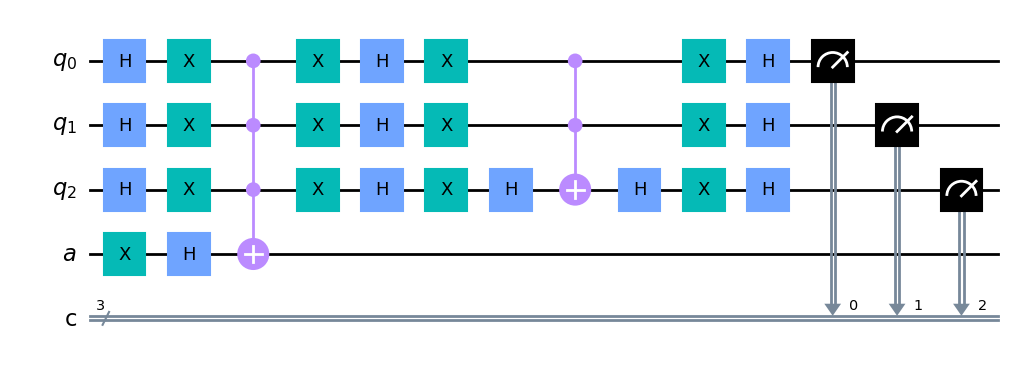

In [31]:
grover = qk.QuantumCircuit(qr_x, qr_a, cr)
grover.compose(state_prep, inplace=True)
grover.compose(oracle, inplace=True)
grover.compose(diffuser, inplace=True)
# -- Insert correct measurement operations here ---

grover.measure(0, cr[0])
grover.measure(1, cr[1])
grover.measure(2, cr[2])
grover.draw('mpl', fold=-1, plot_barriers=False)

## Part (d)

Below, plot the probability of being in the marked state as a function of the number of Grover iterations $k$

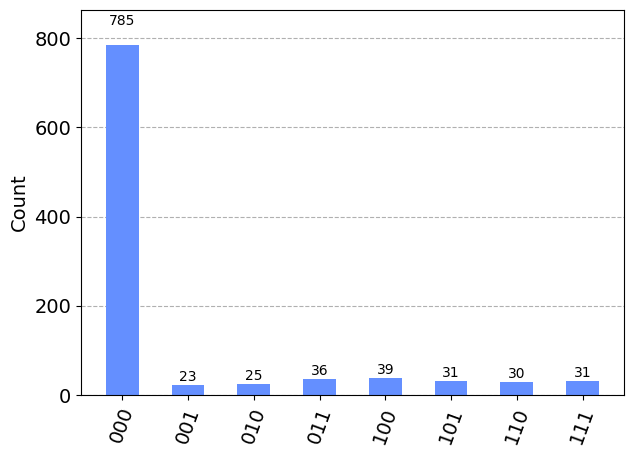

In [32]:
shots = 1000
backend = Aer.get_backend('qasm_simulator')
job = qk.execute(grover, backend=backend, shots=shots)
results = job.result()
counts = results.get_counts(grover)
plot_histogram(counts)

     ┌───┐┌───┐     ┌───┐┌───┐┌───┐                ░ ┌───┐┌───┐┌─┐      
q_0: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■────────░─┤ X ├┤ H ├┤M├──────
     ├───┤├───┤  │  ├───┤├───┤├───┤       │        ░ ├───┤├───┤└╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■────────░─┤ X ├┤ H ├─╫─┤M├───
     ├───┤├───┤  │  ├───┤├───┤├───┤┌───┐┌─┴─┐┌───┐ ░ ├───┤├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░─┤ X ├┤ H ├─╫──╫─┤M├
     ├───┤├───┤┌─┴─┐└───┘└───┘└───┘└───┘└───┘└───┘ ░ └───┘└───┘ ║  ║ └╥┘
  a: ┤ X ├┤ H ├┤ X ├────────────────────────────────────────────╫──╫──╫─
     └───┘└───┘└───┘                                            ║  ║  ║ 
c: 3/═══════════════════════════════════════════════════════════╩══╩══╩═
                                                                0  1  2 
     ┌───┐┌───┐     ┌───┐┌───┐┌───┐                ░ ┌───┐┌───┐┌───┐     ┌───┐»
q_0: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■────────░─┤ X ├┤ H ├┤ X ├──■──┤ X ├»
     ├───┤├───┤  │  ├───┤├───┤├───┤  

     ┌───┐┌───┐     ┌───┐┌───┐┌───┐                ░ ┌───┐┌───┐┌───┐     ┌───┐»
q_0: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■────────░─┤ X ├┤ H ├┤ X ├──■──┤ X ├»
     ├───┤├───┤  │  ├───┤├───┤├───┤       │        ░ ├───┤├───┤├───┤  │  ├───┤»
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■────────░─┤ X ├┤ H ├┤ X ├──■──┤ X ├»
     ├───┤├───┤  │  ├───┤├───┤├───┤┌───┐┌─┴─┐┌───┐ ░ ├───┤├───┤├───┤  │  ├───┤»
q_2: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░─┤ X ├┤ H ├┤ X ├──■──┤ X ├»
     ├───┤├───┤┌─┴─┐└───┘└───┘└───┘└───┘└───┘└───┘ ░ └───┘└───┘└───┘┌─┴─┐└───┘»
  a: ┤ X ├┤ H ├┤ X ├────────────────────────────────────────────────┤ X ├─────»
     └───┘└───┘└───┘                                                └───┘     »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌───┐┌───┐                ░ ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐          »
«q_0: ┤ H ├┤ X ├───────■────────░─┤ X ├

Text(0, 0.5, "Probability of '000'")

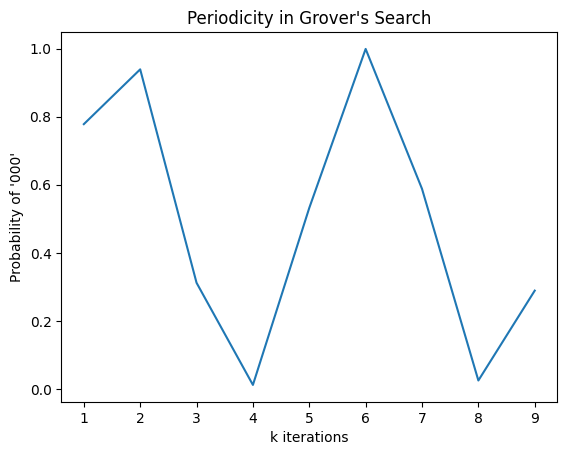

In [33]:
def k_grover(k):
    kGrover = qk.QuantumCircuit(qr_x, qr_a, cr)
    kGrover.compose(state_prep, inplace=True)
    for _ in range(k):
        kGrover.compose(oracle, inplace=True)
        kGrover.compose(diffuser, inplace=True)
    kGrover.measure(0, cr[0])
    kGrover.measure(1, cr[1])
    kGrover.measure(2, cr[2])
    return kGrover

k_grover(2).draw('mpl', fold=-1)

ks = []
probs = []

for k in range(1,10):
    myCircuit = k_grover(k)
    job = qk.execute(myCircuit, backend=backend, shots=shots)
    results = job.result()
    counts = results.get_counts(myCircuit)
    print(myCircuit)
    ks.append(k)
    probs.append(counts['000']/shots)

plt.plot(ks, probs)
plt.title("Periodicity in Grover's Search")
plt.xlabel("k iterations")
plt.ylabel("Probability of '000'")


# Problem 2

In [11]:
num_variables = 3
num_clauses = 7
num_variables = 3
qr_x = qk.QuantumRegister(num_variables, name='q')
qr_r = qk.QuantumRegister(num_clauses, name='r')
qr_a = qk.QuantumRegister(1, name='a')
cr = qk.ClassicalRegister(num_variables, name='c')

## Part (a)

Below, create a circuit that constructs the 3-SAT oracle. Draw the oracle using Qiskit's built-in functions.

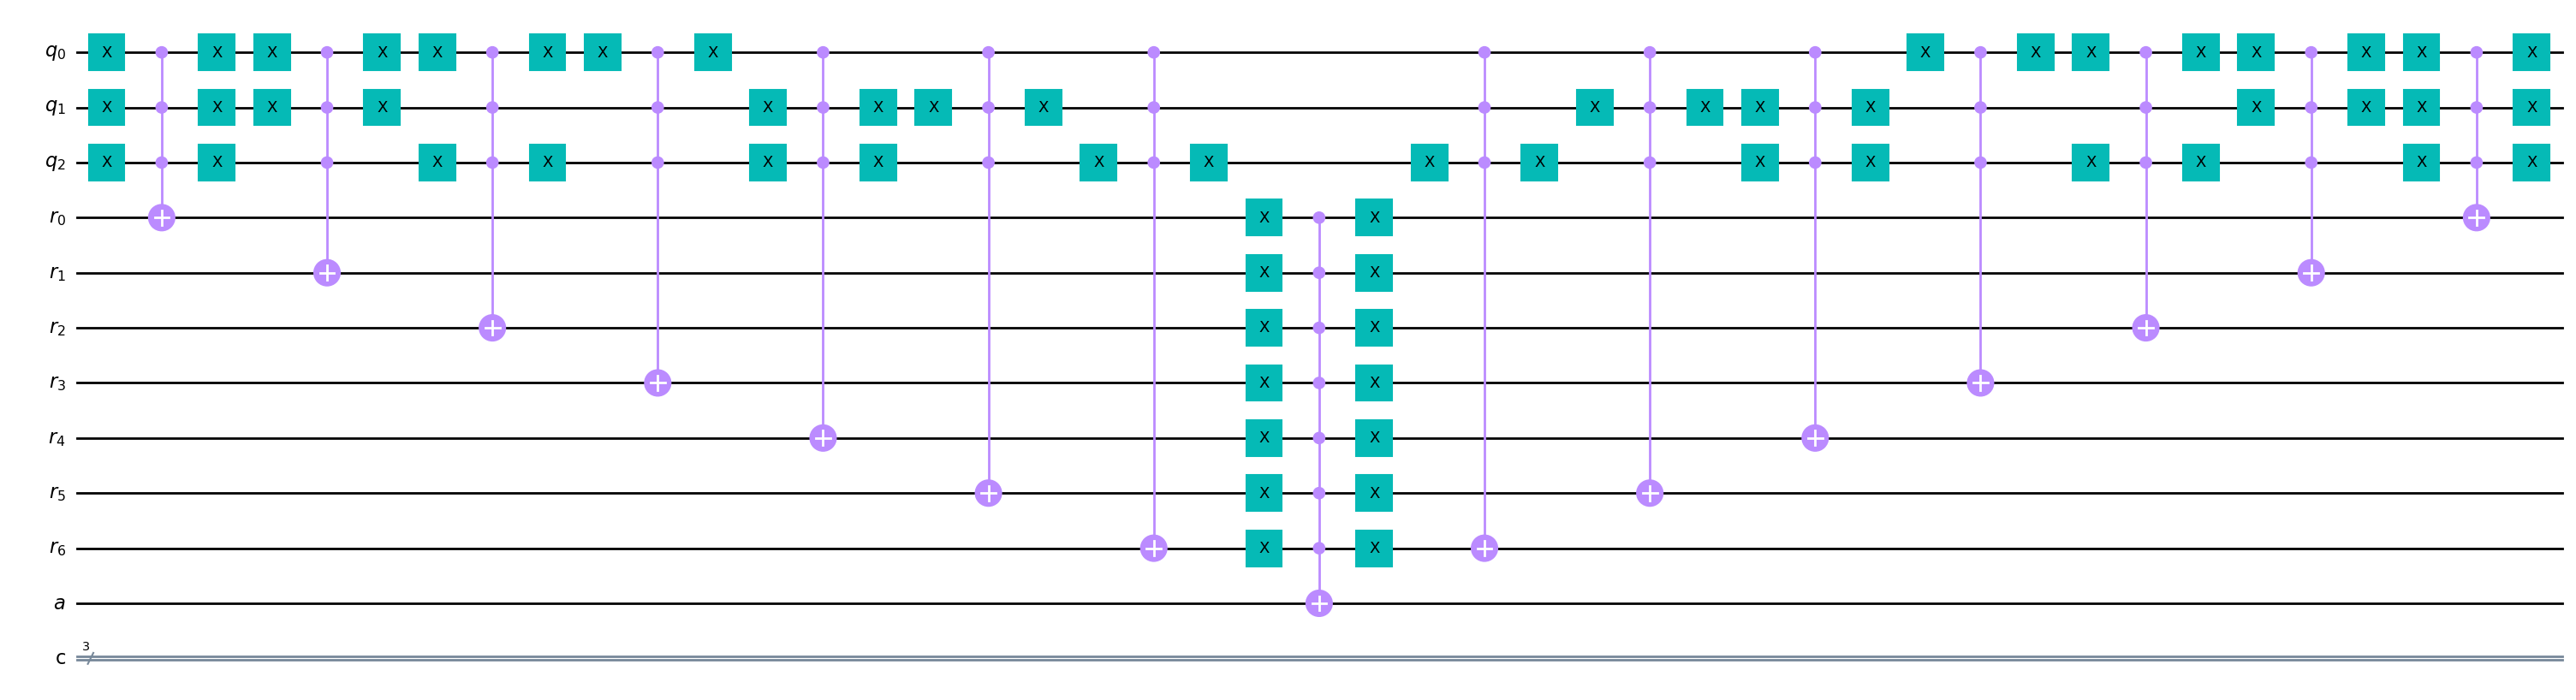

In [12]:
oracle = qk.QuantumCircuit(qr_x, qr_r, qr_a, cr)
# --- Insert oracle circuit here ---
oracle.x([0,1,2])
oracle.mct([0,1,2],3)
oracle.x([0,1,2])

oracle.barrier(range(11))

oracle.x([0,1])
oracle.mct([0,1,2],4)
oracle.x([0,1])

oracle.barrier(range(11))

oracle.x([0,2])
oracle.mct([0,1,2],5)
oracle.x([0,2])

oracle.barrier(range(11))

oracle.x([0])
oracle.mct([0,1,2],6)
oracle.x([0])

oracle.barrier(range(11))

oracle.x([1,2])
oracle.mct([0,1,2],7)
oracle.x([1,2])

oracle.barrier(range(11))

oracle.x([1])
oracle.mct([0,1,2],8)
oracle.x([1])

oracle.barrier(range(11))

oracle.x([2])
oracle.mct([0,1,2],9)
oracle.x([2])

# Checker
oracle.barrier(range(11))

oracle.x([3,4,5,6,7,8,9])
oracle.mct([3,4,5,6,7,8,9],10)
oracle.x([3,4,5,6,7,8,9])

# Uncomputation
oracle.barrier(range(11))

oracle.x([2])
oracle.mct([0,1,2],9)
oracle.x([2])

oracle.barrier(range(11))


oracle.x([1])
oracle.mct([0,1,2],8)
oracle.x([1])

oracle.barrier(range(11))

oracle.x([1,2])
oracle.mct([0,1,2],7)
oracle.x([1,2])

oracle.barrier(range(11))

oracle.x([0])
oracle.mct([0,1,2],6)
oracle.x([0])

oracle.barrier(range(11))


oracle.x([0,2])
oracle.mct([0,1,2],5)
oracle.x([0,2])

oracle.barrier(range(11))


oracle.x([0,1])
oracle.mct([0,1,2],4)
oracle.x([0,1])

oracle.barrier(range(11))


oracle.x([0,1,2])
oracle.mct([0,1,2],3)
oracle.x([0,1,2])


oracle.draw('mpl', fold=-1, plot_barriers = False)

## Part (b)

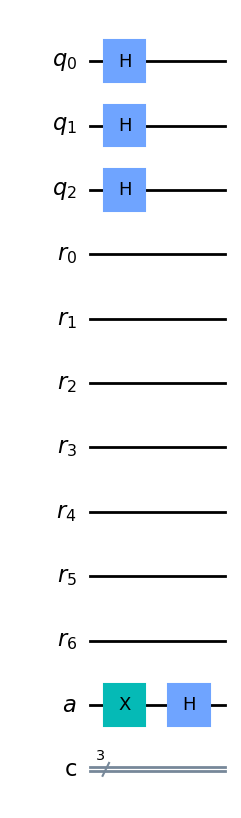

In [13]:
state_prep = qk.QuantumCircuit(qr_x, qr_r, qr_a, cr)
# --- Insert state preparation circuit here ---
state_prep.x(10)
state_prep.h(list(range(3)))
state_prep.h(10)

state_prep.draw('mpl', fold=-1)

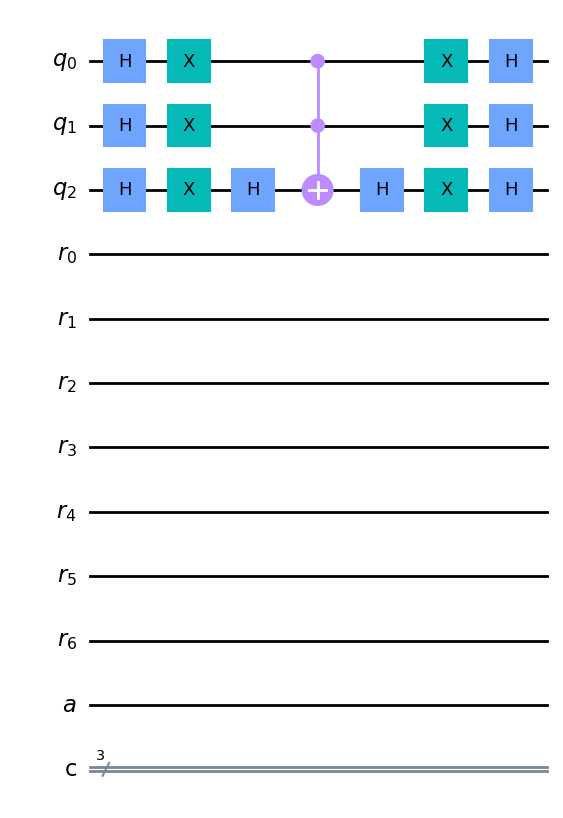

In [14]:
diffuser = qk.QuantumCircuit(qr_x, qr_r, qr_a, cr)
# --- Insert diffuser circuit here ---
diffuser.h(range(3))
diffuser.x(range(3))
diffuser.h(2)
diffuser.mct([0,1], 2)
diffuser.h(2)

diffuser.barrier(range(4))

diffuser.x(range(3))
diffuser.h(range(3))

diffuser.draw('mpl', fold=-1, plot_barriers=False)

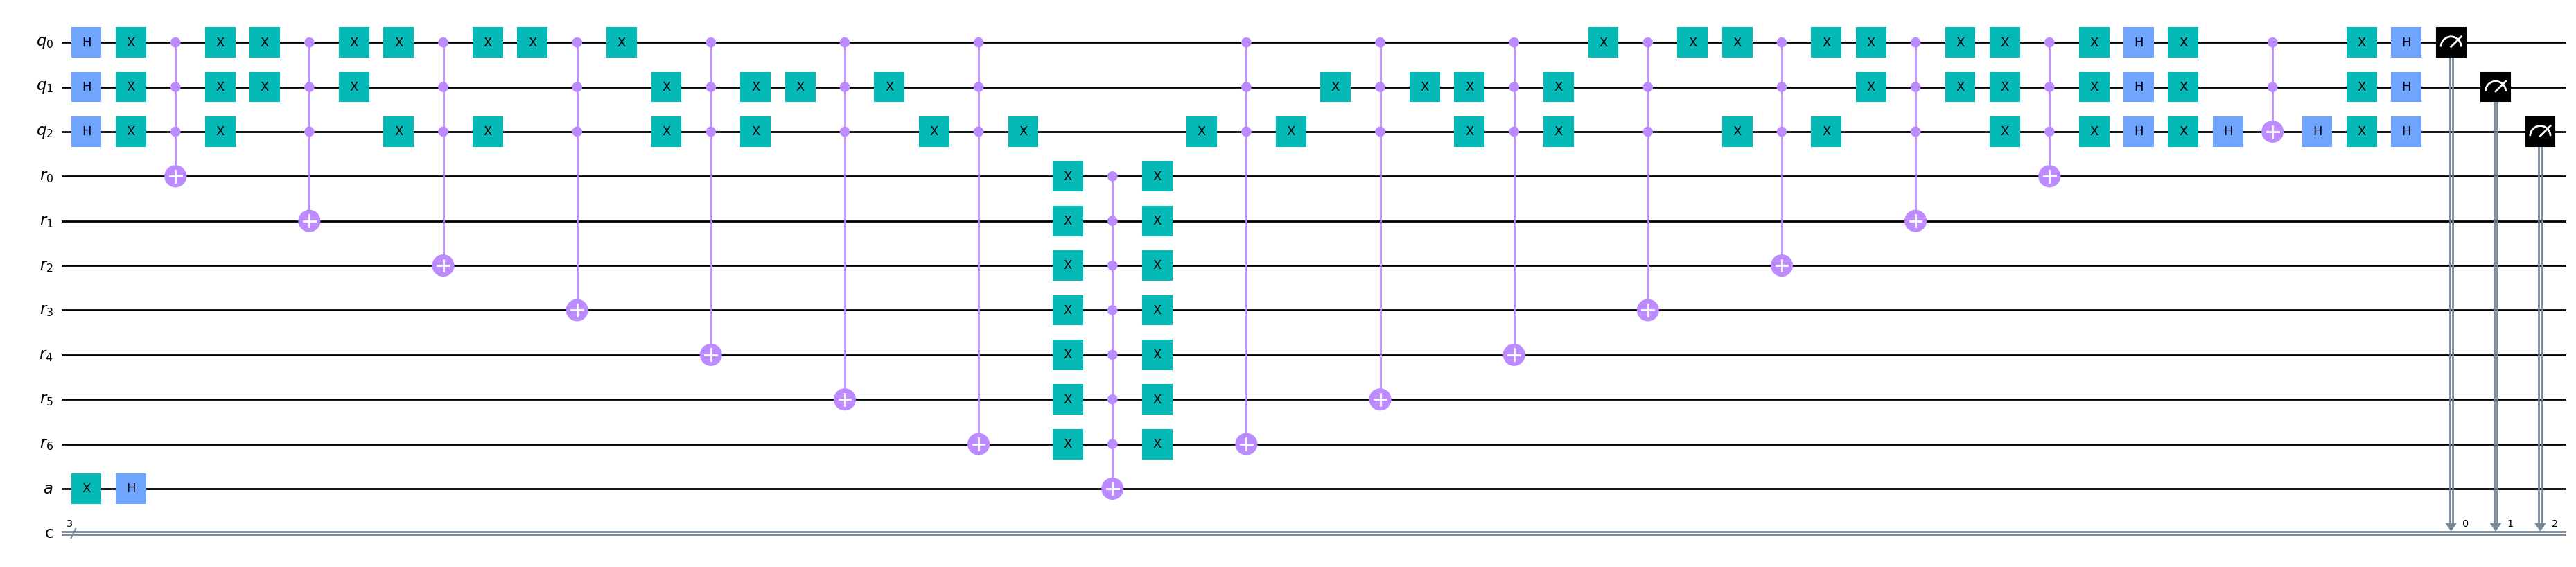

In [15]:
grover_3sat = qk.QuantumCircuit(qr_x, qr_r, qr_a, cr)
grover_3sat.compose(state_prep, inplace=True)
grover_3sat.compose(oracle, inplace=True)
grover_3sat.compose(diffuser, inplace=True)
# -- Insert correct measurement operations here ---
grover_3sat.measure(0, cr[0])
grover_3sat.measure(1, cr[1])
grover_3sat.measure(2, cr[2])
grover_3sat.draw('mpl', fold=-1, plot_barriers = False)

Below, run a simulation of the Grover Algorithm

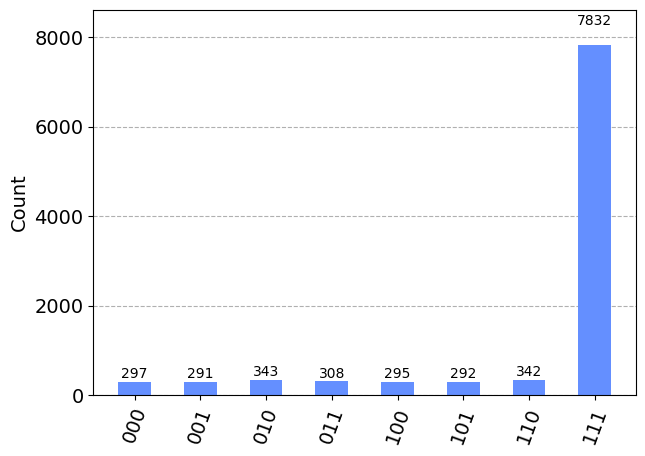

In [16]:
shots = 10000
backend = Aer.get_backend('qasm_simulator')
job = qk.execute(grover_3sat, backend=backend, shots=shots)
results = job.result()
counts = results.get_counts(grover_3sat)
plot_histogram(counts)

## Part (c)

Plot the cumulative probability for the solution states as a function of $k$. Hint: Take a look at the section "Implementation", subsection "Multiple Iterations", subsubsection "Cumulative Probability" in example_2sat.ipynb

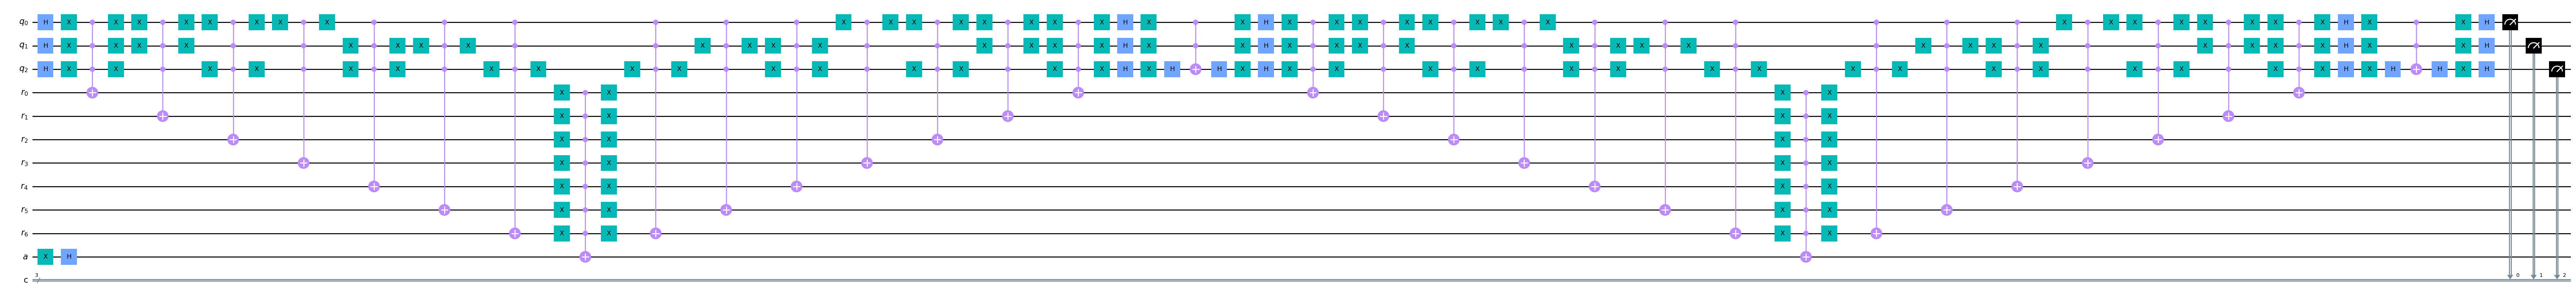

In [17]:
def k_grover_3sat(k):
    kGrover_3sat = qk.QuantumCircuit(qr_x, qr_r, qr_a, cr)
    kGrover_3sat.compose(state_prep, inplace=True)
    
    for _ in range(k):
        kGrover_3sat.compose(oracle, inplace=True)
        kGrover_3sat.compose(diffuser, inplace=True)

    # -- Insert correct measurement operations here ---
    kGrover_3sat.measure(0, cr[0])
    kGrover_3sat.measure(1, cr[1])
    kGrover_3sat.measure(2, cr[2])
    return kGrover_3sat

k_grover_3sat(2).draw('mpl', fold=-1, plot_barriers=False)

In [25]:
ks = []
probs = []

for k in range(1,10):
    myCircuit = k_grover_3sat(k)
    job = qk.execute(myCircuit, backend=backend, shots=shots)
    results = job.result()
    counts = results.get_counts(myCircuit)
    
    ks.append(k)
    probs.append(counts['111']/shots)
    
    print(myCircuit)
'''
plt.plot(ks, probs)
plt.title("Periodicity in 3-SAT Grover's Search")
plt.xlabel("k iterations")
plt.ylabel("Probability of '111'")'''

     ┌───┐┌───┐     ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐     ┌───┐»
q_0: ┤ H ├┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├»
     ├───┤├───┤  │  ├───┤ ░ ├───┤  │  ├───┤ ░ └───┘  │  └───┘ ░ └───┘  │  └───┘»
q_1: ┤ H ├┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░────────■────────░────────■───────»
     ├───┤├───┤  │  ├───┤ ░ └───┘  │  └───┘ ░ ┌───┐  │  ┌───┐ ░        │       »
q_2: ┤ H ├┤ X ├──■──┤ X ├─░────────■────────░─┤ X ├──■──┤ X ├─░────────■───────»
     └───┘└───┘┌─┴─┐└───┘ ░        │        ░ └───┘  │  └───┘ ░        │       »
r_0: ──────────┤ X ├──────░────────┼────────░────────┼────────░────────┼───────»
               └───┘      ░      ┌─┴─┐      ░        │        ░        │       »
r_1: ─────────────────────░──────┤ X ├──────░────────┼────────░────────┼───────»
                          ░      └───┘      ░      ┌─┴─┐      ░        │       »
r_2: ─────────────────────░─────────────────░──────┤ X ├──────░────────┼───────»
                          ░ 

     ┌───┐┌───┐     ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐     ┌───┐»
q_0: ┤ H ├┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├»
     ├───┤├───┤  │  ├───┤ ░ ├───┤  │  ├───┤ ░ └───┘  │  └───┘ ░ └───┘  │  └───┘»
q_1: ┤ H ├┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░────────■────────░────────■───────»
     ├───┤├───┤  │  ├───┤ ░ └───┘  │  └───┘ ░ ┌───┐  │  ┌───┐ ░        │       »
q_2: ┤ H ├┤ X ├──■──┤ X ├─░────────■────────░─┤ X ├──■──┤ X ├─░────────■───────»
     └───┘└───┘┌─┴─┐└───┘ ░        │        ░ └───┘  │  └───┘ ░        │       »
r_0: ──────────┤ X ├──────░────────┼────────░────────┼────────░────────┼───────»
               └───┘      ░      ┌─┴─┐      ░        │        ░        │       »
r_1: ─────────────────────░──────┤ X ├──────░────────┼────────░────────┼───────»
                          ░      └───┘      ░      ┌─┴─┐      ░        │       »
r_2: ─────────────────────░─────────────────░──────┤ X ├──────░────────┼───────»
                          ░ 

     ┌───┐┌───┐     ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐     ┌───┐»
q_0: ┤ H ├┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├»
     ├───┤├───┤  │  ├───┤ ░ ├───┤  │  ├───┤ ░ └───┘  │  └───┘ ░ └───┘  │  └───┘»
q_1: ┤ H ├┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░────────■────────░────────■───────»
     ├───┤├───┤  │  ├───┤ ░ └───┘  │  └───┘ ░ ┌───┐  │  ┌───┐ ░        │       »
q_2: ┤ H ├┤ X ├──■──┤ X ├─░────────■────────░─┤ X ├──■──┤ X ├─░────────■───────»
     └───┘└───┘┌─┴─┐└───┘ ░        │        ░ └───┘  │  └───┘ ░        │       »
r_0: ──────────┤ X ├──────░────────┼────────░────────┼────────░────────┼───────»
               └───┘      ░      ┌─┴─┐      ░        │        ░        │       »
r_1: ─────────────────────░──────┤ X ├──────░────────┼────────░────────┼───────»
                          ░      └───┘      ░      ┌─┴─┐      ░        │       »
r_2: ─────────────────────░─────────────────░──────┤ X ├──────░────────┼───────»
                          ░ 

     ┌───┐┌───┐     ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐     ┌───┐»
q_0: ┤ H ├┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├»
     ├───┤├───┤  │  ├───┤ ░ ├───┤  │  ├───┤ ░ └───┘  │  └───┘ ░ └───┘  │  └───┘»
q_1: ┤ H ├┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░────────■────────░────────■───────»
     ├───┤├───┤  │  ├───┤ ░ └───┘  │  └───┘ ░ ┌───┐  │  ┌───┐ ░        │       »
q_2: ┤ H ├┤ X ├──■──┤ X ├─░────────■────────░─┤ X ├──■──┤ X ├─░────────■───────»
     └───┘└───┘┌─┴─┐└───┘ ░        │        ░ └───┘  │  └───┘ ░        │       »
r_0: ──────────┤ X ├──────░────────┼────────░────────┼────────░────────┼───────»
               └───┘      ░      ┌─┴─┐      ░        │        ░        │       »
r_1: ─────────────────────░──────┤ X ├──────░────────┼────────░────────┼───────»
                          ░      └───┘      ░      ┌─┴─┐      ░        │       »
r_2: ─────────────────────░─────────────────░──────┤ X ├──────░────────┼───────»
                          ░ 

     ┌───┐┌───┐     ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐     ┌───┐»
q_0: ┤ H ├┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├»
     ├───┤├───┤  │  ├───┤ ░ ├───┤  │  ├───┤ ░ └───┘  │  └───┘ ░ └───┘  │  └───┘»
q_1: ┤ H ├┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░────────■────────░────────■───────»
     ├───┤├───┤  │  ├───┤ ░ └───┘  │  └───┘ ░ ┌───┐  │  ┌───┐ ░        │       »
q_2: ┤ H ├┤ X ├──■──┤ X ├─░────────■────────░─┤ X ├──■──┤ X ├─░────────■───────»
     └───┘└───┘┌─┴─┐└───┘ ░        │        ░ └───┘  │  └───┘ ░        │       »
r_0: ──────────┤ X ├──────░────────┼────────░────────┼────────░────────┼───────»
               └───┘      ░      ┌─┴─┐      ░        │        ░        │       »
r_1: ─────────────────────░──────┤ X ├──────░────────┼────────░────────┼───────»
                          ░      └───┘      ░      ┌─┴─┐      ░        │       »
r_2: ─────────────────────░─────────────────░──────┤ X ├──────░────────┼───────»
                          ░ 

     ┌───┐┌───┐     ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐     ┌───┐»
q_0: ┤ H ├┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├»
     ├───┤├───┤  │  ├───┤ ░ ├───┤  │  ├───┤ ░ └───┘  │  └───┘ ░ └───┘  │  └───┘»
q_1: ┤ H ├┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░────────■────────░────────■───────»
     ├───┤├───┤  │  ├───┤ ░ └───┘  │  └───┘ ░ ┌───┐  │  ┌───┐ ░        │       »
q_2: ┤ H ├┤ X ├──■──┤ X ├─░────────■────────░─┤ X ├──■──┤ X ├─░────────■───────»
     └───┘└───┘┌─┴─┐└───┘ ░        │        ░ └───┘  │  └───┘ ░        │       »
r_0: ──────────┤ X ├──────░────────┼────────░────────┼────────░────────┼───────»
               └───┘      ░      ┌─┴─┐      ░        │        ░        │       »
r_1: ─────────────────────░──────┤ X ├──────░────────┼────────░────────┼───────»
                          ░      └───┘      ░      ┌─┴─┐      ░        │       »
r_2: ─────────────────────░─────────────────░──────┤ X ├──────░────────┼───────»
                          ░ 

     ┌───┐┌───┐     ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐     ┌───┐»
q_0: ┤ H ├┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├»
     ├───┤├───┤  │  ├───┤ ░ ├───┤  │  ├───┤ ░ └───┘  │  └───┘ ░ └───┘  │  └───┘»
q_1: ┤ H ├┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░────────■────────░────────■───────»
     ├───┤├───┤  │  ├───┤ ░ └───┘  │  └───┘ ░ ┌───┐  │  ┌───┐ ░        │       »
q_2: ┤ H ├┤ X ├──■──┤ X ├─░────────■────────░─┤ X ├──■──┤ X ├─░────────■───────»
     └───┘└───┘┌─┴─┐└───┘ ░        │        ░ └───┘  │  └───┘ ░        │       »
r_0: ──────────┤ X ├──────░────────┼────────░────────┼────────░────────┼───────»
               └───┘      ░      ┌─┴─┐      ░        │        ░        │       »
r_1: ─────────────────────░──────┤ X ├──────░────────┼────────░────────┼───────»
                          ░      └───┘      ░      ┌─┴─┐      ░        │       »
r_2: ─────────────────────░─────────────────░──────┤ X ├──────░────────┼───────»
                          ░ 

     ┌───┐┌───┐     ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐     ┌───┐»
q_0: ┤ H ├┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├»
     ├───┤├───┤  │  ├───┤ ░ ├───┤  │  ├───┤ ░ └───┘  │  └───┘ ░ └───┘  │  └───┘»
q_1: ┤ H ├┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░────────■────────░────────■───────»
     ├───┤├───┤  │  ├───┤ ░ └───┘  │  └───┘ ░ ┌───┐  │  ┌───┐ ░        │       »
q_2: ┤ H ├┤ X ├──■──┤ X ├─░────────■────────░─┤ X ├──■──┤ X ├─░────────■───────»
     └───┘└───┘┌─┴─┐└───┘ ░        │        ░ └───┘  │  └───┘ ░        │       »
r_0: ──────────┤ X ├──────░────────┼────────░────────┼────────░────────┼───────»
               └───┘      ░      ┌─┴─┐      ░        │        ░        │       »
r_1: ─────────────────────░──────┤ X ├──────░────────┼────────░────────┼───────»
                          ░      └───┘      ░      ┌─┴─┐      ░        │       »
r_2: ─────────────────────░─────────────────░──────┤ X ├──────░────────┼───────»
                          ░ 

     ┌───┐┌───┐     ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐     ┌───┐»
q_0: ┤ H ├┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├»
     ├───┤├───┤  │  ├───┤ ░ ├───┤  │  ├───┤ ░ └───┘  │  └───┘ ░ └───┘  │  └───┘»
q_1: ┤ H ├┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░────────■────────░────────■───────»
     ├───┤├───┤  │  ├───┤ ░ └───┘  │  └───┘ ░ ┌───┐  │  ┌───┐ ░        │       »
q_2: ┤ H ├┤ X ├──■──┤ X ├─░────────■────────░─┤ X ├──■──┤ X ├─░────────■───────»
     └───┘└───┘┌─┴─┐└───┘ ░        │        ░ └───┘  │  └───┘ ░        │       »
r_0: ──────────┤ X ├──────░────────┼────────░────────┼────────░────────┼───────»
               └───┘      ░      ┌─┴─┐      ░        │        ░        │       »
r_1: ─────────────────────░──────┤ X ├──────░────────┼────────░────────┼───────»
                          ░      └───┘      ░      ┌─┴─┐      ░        │       »
r_2: ─────────────────────░─────────────────░──────┤ X ├──────░────────┼───────»
                          ░ 

'\nplt.plot(ks, probs)\nplt.title("Periodicity in 3-SAT Grover\'s Search")\nplt.xlabel("k iterations")\nplt.ylabel("Probability of \'111\'")'

## Part (d)

from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import depolarizing_error

In [ ]:
# Add depolarizing error to the hadamard gates
p =  # probability of depolarization
error = depolarizing_error(p, 1)
noise_model.add_all_qubit_quantum_error(error, ['h', 'x', 'sx'])

Plot the cumulative probability for the solution states as a function of $k$. Hint: Take a look at the section "Faulty Grover", subsection "Assuming Native Multi-Qubit Gates" in example_2sat.ipynb.